### Relevante pakker

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [3]:
df = pd.read_csv("lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Klassifisering,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size,Unnamed: 16
0,76158,Batboat The Penguin Pursuit!,Batmanâ¢,B,54.0,$9.99,$9.89,2020,Ages_4+,44.0,2.0,Box,NaN,41.0,Retail,Small,NaN
1,70836,Battle-Ready Batman and MetalBeard,Batmanâ¢,B,168.0,$19.99,$19.99,2019,Ages_6+,64.0,2.0,Box,0.24Kg (0.53 lb),98.0,Retail,Small,NaN
2,76137,Batman vs. The Riddler Robbery,Batmanâ¢,B,59.0,$9.99,$20.92,2019,Ages_4+,36.0,2.0,Box,NaN,44.0,Retail,Small,NaN
3,76110,Batman: The Attack of the Talons,Batmanâ¢,B,155.0,$19.99,$32.25,2018,Ages_7-12,60.0,3.0,Box,0.34Kg (0.75 lb),82.0,Retail,Small,NaN
4,76116,Batman Batsub and the Underwater Clash,Batmanâ¢,B,174.0,$19.99,$36.00,2019,Ages_7+,64.0,3.0,Box,0.32Kg (0.7 lb),82.0,Retail,Small,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,40391,First Order Stormtrooper,Star Warsâ¢,B,151.0,$19.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,55.0,LEGO exclusive,Small,NaN
1300,40431,BB-8,Star Warsâ¢,B,171.0,$19.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,68.0,LEGO exclusive,Small,NaN
1301,75279,Star Wars Advent Calendar,Star Warsâ¢,B,311.0,$39.99,NaN,2020,Ages_6+,NaN,NaN,Box,NaN,185.0,Retail,Small,NaN
1302,75290,Mos Eisley Cantina,Star Warsâ¢,B,3187.0,$349.99,NaN,2020,Ages_18+,NaN,NaN,Box,NaN,NaN,LEGO exclusive,Small,NaN


In [4]:
# fjerner forklaringsvariabler vi ikke trenger


df2 = df[['Set_Name', 'Theme', "Klassifisering",'Price', 'Pages', "Pieces", 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

klassifisering_mapping = {"N": 0, "B": 1, "G": 2}
df2['Klassifisering_norm'] = df2['Klassifisering'].map(klassifisering_mapping)

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)





df2

,Set_Name,Theme,Klassifisering,Price,Pages,Pieces,Unique_Pieces,Klassifisering_norm
0,Batboat The Penguin Pursuit!,Batman,B,9.99,44.0,54.0,41.0,1
1,Battle-Ready Batman and MetalBeard,Batman,B,19.99,64.0,168.0,98.0,1
2,Batman vs. The Riddler Robbery,Batman,B,9.99,36.0,59.0,44.0,1
3,Batman: The Attack of the Talons,Batman,B,19.99,60.0,155.0,82.0,1
4,Batman Batsub and the Underwater Clash,Batman,B,19.99,64.0,174.0,82.0,1
...,...,...,...,...,...,...,...,...
1294,Death Star Final Duel,Star Wars,B,99.99,140.0,775.0,241.0,1
1295,Resistance I-TS Transport,Star Wars,B,99.99,140.0,932.0,215.0,1
1297,TIE Fighter Pilot,Star Wars,B,59.99,148.0,724.0,155.0,1
1298,Y-wing Starfighter,Star Wars,B,199.99,220.0,1967.0,359.0,1


### Mer eller mindre relevante kodesnutter

In [5]:
print(df2.mean(numeric_only = True))

Price                   47.082733
Pages                  107.005423
Pieces                 438.041215
Unique_Pieces          135.129067
Klassifisering_norm      0.952278
dtype: float64


In [12]:
print(df2['Theme'].value_counts())

Star Wars            110
Friends              100
City                  94
NINJAGO               78
DUPLO                 51
Marvel                50
Disney                41
Creator 3-in-1        38
Technic               38
BrickHeadz            31
Minecraft             26
THE LEGO MOVIE 2      26
Harry Potter          22
Jurassic World        20
Classic               20
Hidden Side           19
Speed Champions       17
Batman                16
Creator Expert        15
Ideas                 12
Juniors               12
Architecture          11
DC                     9
Trolls World Tour      9
Monkie Kid             9
DOTS                   8
LEGO Frozen 2          8
Overwatch              8
Unikitty               6
Xtra                   4
Powered UP             4
Minifigures            3
Spider-Man             2
Minions                2
Powerpuff Girls        2
Stranger Things        1
Name: Theme, dtype: int64


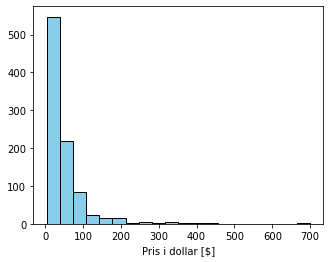

In [13]:
plt.hist(df2['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

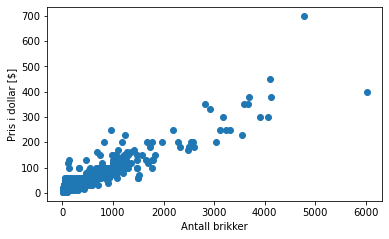

In [22]:
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

In [20]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2['Price'].idxmax()])

Set_Name          Imperial Star Destroyer
Theme                           Star Wars
Klassifisering                          B
Price                              699.99
Pages                               444.0
Pieces                             4784.0
Unique_Pieces                       445.0
Name: 1279, dtype: object


In [23]:
# og hvilket har flest brikker?
print(df2.loc[df2['Pieces'].idxmax()])

Set_Name          Hogwarts Castle
Theme                Harry Potter
Klassifisering                  N
Price                      399.99
Pages                       636.0
Pieces                     6020.0
Unique_Pieces               624.0
Name: 756, dtype: object


In [77]:
# hvilke tema har de billigste settene?
df2.groupby('Theme')['Price'].mean().sort_values(ascending=True)[:3]

Theme
Xtra            3.990000
Minifigures    12.990000
BrickHeadz     13.731935
Name: Price, dtype: float64

In [ ]:
# hvilke tema har flest brikker?
df2.groupby('Theme')['Pieces'].mean().sort_values(ascending=False)[:3]

KeyError: 'Minifigures'

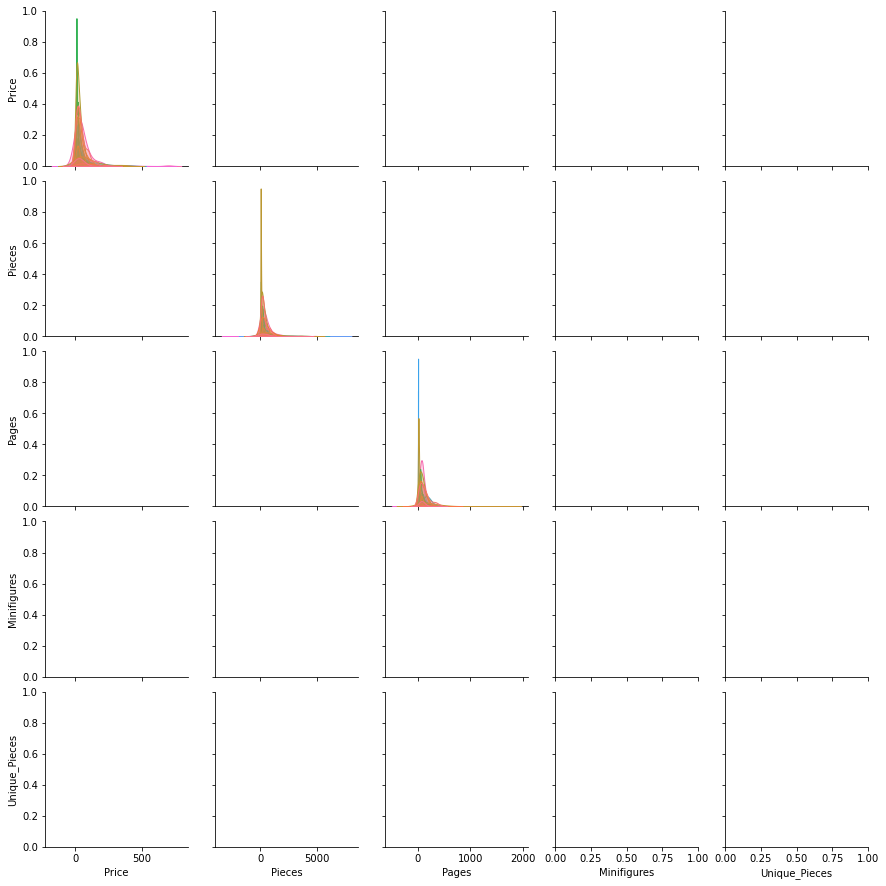

In [25]:
sns.pairplot(df2, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [78]:
# enkel lineær regresjon
formel = 'Price ~ Klassifisering_norm'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.584
Date:                Thu, 02 Nov 2023   Prob (F-statistic):             0.0586
Time:                        09:24:44   Log-Likelihood:                -5049.4
No. Observations:                 922   AIC:                         1.010e+04
Df Residuals:                     920   BIC:                         1.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              52.3419      3.369     15.535      0.000      45.729      58.955
Klassifisering_norm    -5.5228      2.917     -1.893      0.059     -11.248       0.202
==============================================================================
Omnibus:                      841.318   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31109.052
Skew:                           4.120   Prob(JB):                         0.00
Kurtosis:                      30.237   Cond. No.                         3.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

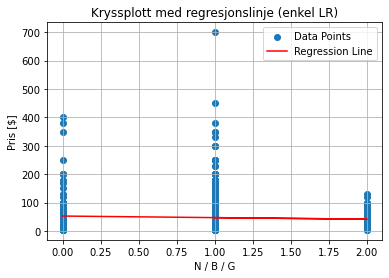

In [107]:
slope = resultat.params['Klassifisering_norm']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Klassifisering_norm'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Klassifisering_norm'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('N / B / G')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

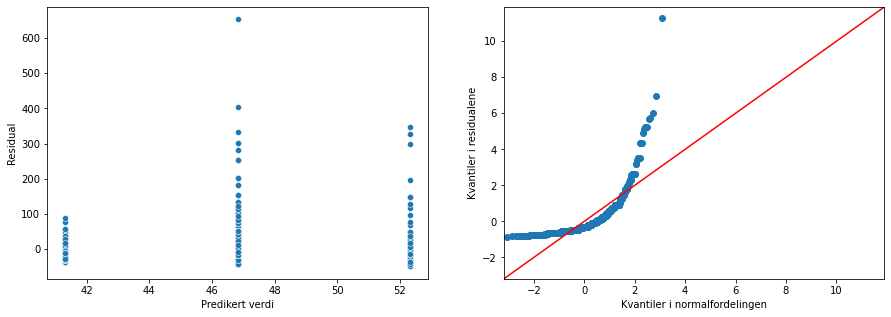

In [65]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

KeyError: 'Minifigures'

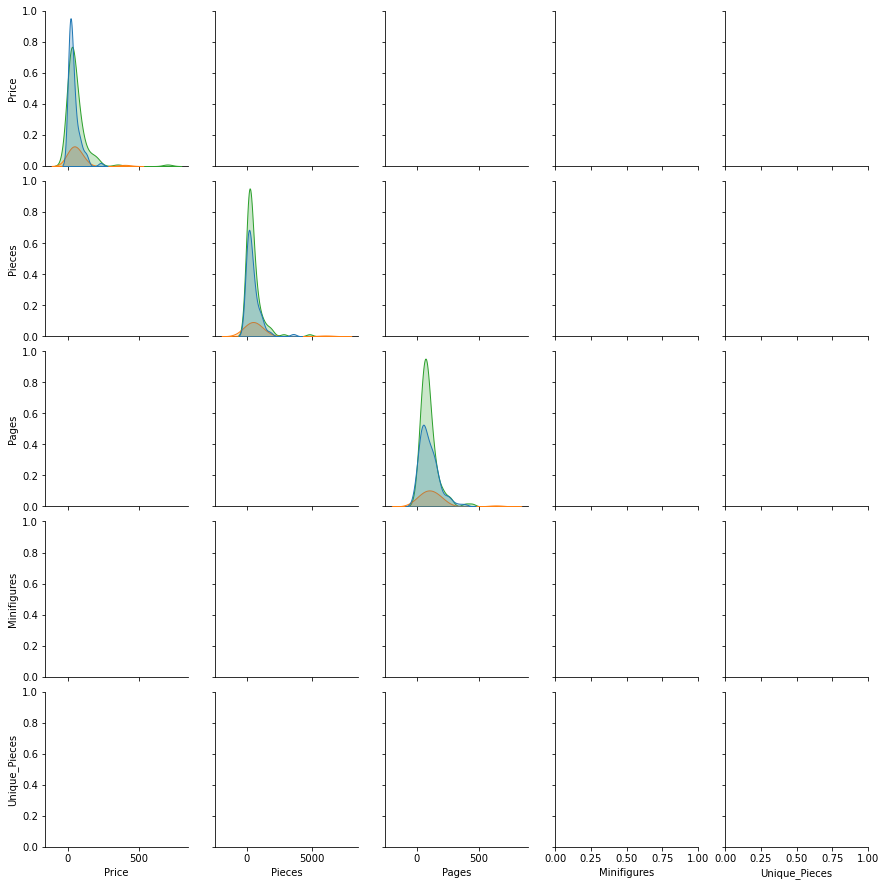

In [95]:
mythemes = ['Star Wars', 'NINJAGO', 'Harry Potter']
subset_df = df2[df2['Theme'].isin(mythemes)]
sns.pairplot(subset_df, vars = ['Price', 'Pieces', 'Pages', 'Minifigures', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [88]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

In [91]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

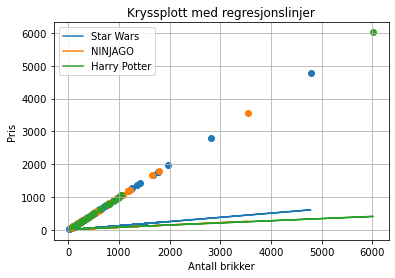

In [93]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Pieces'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [9]:
# multippel lineær regresjon
modell3_mlr = smf.ols('Price ~ Pieces + Klassifisering_norm + "Ages_norm'   , data = df2)
modell3_mlr.fit().summary()

PatsyError: error tokenizing input (maybe an unclosed string?)
    Price ~ Pieces + Klassifisering_norm + "Ages_norm
                                          ^

In [82]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols('Price ~ Pieces + C(Theme, Treatment("Star Wars"))' , data = subset_df)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     448.1
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           5.61e-90
Time:                        09:25:15   Log-Likelihood:                -976.53
No. Observations:                 210   AIC:                             1961.
Df Residuals:                     206   BIC:                             1974.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           12.5292      2.745      4.564      0.000       7.117      17.942
C(Theme, Treatment("Star Wars"))[T.Harry Potter]   -17.7823      6.009     -2.959      0.003     -29.630      -5.934
C(Theme, Treatment("Star Wars"))[T.NINJAGO]        -15.0787      3.785     -3.984      0.000     -22.541      -7.616
Pieces                                               0.0946      0.003     36.185      0.000       0.089       0.100
==============================================================================
Omnibus:                      170.947   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16680.355
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                      46.423   Cond. No.                     2.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

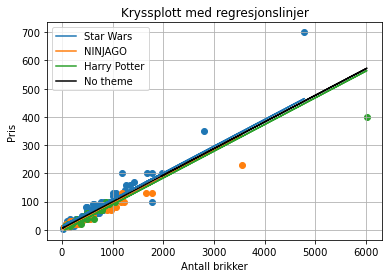

In [83]:
# plott
intercept = [modell3_mlr.fit().params['Theme[T.Star Wars]'], modell3_mlr.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label = 'No theme')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [106]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols('Price ~ Pieces*Klassifisering_norm' , data = subset_df)
modell3_mlri.fit().summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     596.7
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          2.81e-101
Time:                        09:32:26   Log-Likelihood:                -949.99
No. Observations:                 210   AIC:                             1908.
Df Residuals:                     206   BIC:                             1921.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     16.8126      5.684      2.958      0.003       5.605      28.020
Pieces                         0.0652      0.004     16.132      0.000       0.057       0.073
Klassifisering_norm          -17.2959      6.058     -2.855      0.005     -29.239      -5.353
Pieces:Klassifisering_norm     0.0439      0.005      8.927      0.000       0.034       0.054
==============================================================================
Omnibus:                       87.381   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8378.190
Skew:                           0.407   Prob(JB):                         0.00
Kurtosis:                      33.933   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.Star Wars]'], modell3_mlri.fit().params['Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params['Pieces:Theme[T.Star Wars]'], modell3_mlri.fit().params['Pieces:Theme[T.NINJAGO]'], 0] + modell3_mlri.fit().params['Pieces']

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df['Pieces'])
regression_y = res_sub.params['Pieces'] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

In [ ]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [ ]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2['Theme'].isin(['Harry Potter', 'NINJAGO', 'Star Wars']), 'Cat1', 
                      np.where(df2['Theme'].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

In [ ]:
df2.groupby(['cat', 'Theme']).size().reset_index(name = 'Count')